In [1]:

import datetime

import copy

import random



In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
# plt.style.use('seaborn')
# plt.style.use(['dark_background', 'ggplot'])

import seaborn as sns
# sns.set()

# import scipy
# import scipy.stats as stats


# # sympy = symbolic math in Python
# import sympy as sym
# import sympy.plotting.plot as symplot


# make the equations look nicer

# from IPython.display import display
# display.set_matplotlib_formats('svg') # Deprecated since version 7.23

import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [104]:

import sklearn


# from sklearn.feature_extraction.text import CountVectorizer

# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline
# from sklearn.impute import SimpleImputer
# from sklearn.preprocessing import OneHotEncoder

# # Modelling
# from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split

# from sklearn.model_selection import GridSearchCV










In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F

from torch.utils.data import TensorDataset, DataLoader

from torch.nn.utils.rnn import pad_sequence




torch.__version__

'1.10.2'

In [5]:
import torchvision
import torchvision.transforms as T



torchvision.__version__

'0.11.3'

In [6]:
random.seed(0)
np.random.seed(0)
torch.manual_seed(0)

In [154]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [7]:
# date = np.datetime64("2000-01-01")
# date_strings = date.astype(str).split('-'). 
# # >> ['2000', '01', '01']

# year_int = int(date_strings[0])

'text.txt'

[ 1-1-1800 to 31-12-2200 ]

[day condition] [month condition] [leap year condition] [decade condition] date

[MON] [DEC] [False] [196] 3-12-1962
[THU] [DEC] [True] [204] 3-12-2048
[WED] [JAN] [False] [181] 10-1-1810

In [8]:
# data = np.loadtxt(open('text.txt','r'),delimiter=' ')
ori = pd.read_csv('./data/data.txt', sep=' ', header=None)

In [9]:
ori.columns = ['day', 'month', 'leap_year', 'decade', 'date']

In [10]:
ori

,day,month,leap_year,decade,date
0,[WED],[JAN],[False],[180],1-1-1800
1,[THU],[JAN],[False],[180],1-1-1801
2,[FRI],[JAN],[False],[180],1-1-1802
3,[SAT],[JAN],[False],[180],1-1-1803
4,[SUN],[JAN],[True],[180],1-1-1804
...,...,...,...,...,...
146457,[SAT],[DEC],[True],[219],31-12-2196
146458,[SUN],[DEC],[False],[219],31-12-2197
146459,[MON],[DEC],[False],[219],31-12-2198
146460,[TUE],[DEC],[False],[219],31-12-2199


In [11]:
# data.date = pd.to_datetime(data.date, format='%d-%m-%Y', infer_datetime_format=False)
# # pd.to_datetime(data.date, infer_datetime_format=False)

In [12]:
ori.dtypes

day          object
month        object
leap_year    object
decade       object
date         object
dtype: object

In [13]:
data_backup = copy.deepcopy(ori)
data = copy.deepcopy(ori)

In [14]:
data

,day,month,leap_year,decade,date
0,[WED],[JAN],[False],[180],1-1-1800
1,[THU],[JAN],[False],[180],1-1-1801
2,[FRI],[JAN],[False],[180],1-1-1802
3,[SAT],[JAN],[False],[180],1-1-1803
4,[SUN],[JAN],[True],[180],1-1-1804
...,...,...,...,...,...
146457,[SAT],[DEC],[True],[219],31-12-2196
146458,[SUN],[DEC],[False],[219],31-12-2197
146459,[MON],[DEC],[False],[219],31-12-2198
146460,[TUE],[DEC],[False],[219],31-12-2199


In [15]:
data.date

0           1-1-1800
1           1-1-1801
2           1-1-1802
3           1-1-1803
4           1-1-1804
             ...    
146457    31-12-2196
146458    31-12-2197
146459    31-12-2198
146460    31-12-2199
146461    31-12-2200
Name: date, Length: 146462, dtype: object

In [16]:
# # data['date'] = pd.date_range('3-12-2048', periods=10)
# # data['date'] = pd.date_range('12-3-1962', periods=10)

# # 1-1-1800 to 31-12-2200
# data['date'] = pd.date_range(start='1-1-1800',end='12-31-2200')


data.date = pd.to_datetime(data.date, format='%d-%m-%Y', infer_datetime_format=False)

# # data.date = data.date.dt.strftime('%d-%m-%Y')
# # data.date = pd.to_datetime(data.date.dt.strftime('%d-%m-%Y'), format='%d-%m-%Y', infer_datetime_format=False)



In [17]:
data.dtypes

day                  object
month                object
leap_year            object
decade               object
date         datetime64[ns]
dtype: object

In [18]:
data.date[0]

Timestamp('1800-01-01 00:00:00')

In [19]:
data.date[0].day_of_week

2

In [20]:
data.date[0].day_name()

'Wednesday'

In [21]:
data.date[0].month_name()

'January'

In [22]:
data.date[0].is_leap_year

False

In [23]:
# print(data.date_period[0].day)
# print(data.date_period[0].month)
print(data.date[0].year)

1800


In [24]:
data.date[0].year // 10

180

In [25]:
# for i in range(len(data)):

#     day_str = str(data.date.iloc[i].day_name()[:3].upper())
#     data.day.loc[i] = str(f'[{day_str}]')
    
#     month_str = str(data.date.iloc[i].month_name()[:3].upper())
#     data.month.loc[i] = str(f'[{month_str}]')

#     leap_str = str(data.date.iloc[i].is_leap_year)
#     data.leap_year.loc[i] = str(f'[{leap_str}]')
    
    
#     decade_str = str(data.date.iloc[i].year // 10)
#     data.decade.loc[i] = str(f'[{decade_str}]')
    
    

# data.date = data.date.dt.strftime('%d-%m-%Y')
# data.to_csv('test.txt', sep=' ', header=None, index=False)

In [26]:
data

,day,month,leap_year,decade,date
0,[WED],[JAN],[False],[180],1800-01-01
1,[THU],[JAN],[False],[180],1801-01-01
2,[FRI],[JAN],[False],[180],1802-01-01
3,[SAT],[JAN],[False],[180],1803-01-01
4,[SUN],[JAN],[True],[180],1804-01-01
...,...,...,...,...,...
146457,[SAT],[DEC],[True],[219],2196-12-31
146458,[SUN],[DEC],[False],[219],2197-12-31
146459,[MON],[DEC],[False],[219],2198-12-31
146460,[TUE],[DEC],[False],[219],2199-12-31


In [27]:
data.leap_year = data.leap_year.map({'[False]': float(0),
                                     '[True]' : float(1)})

# data.leap_year = data.leap_year.astype(np.float64)

In [28]:
data

,day,month,leap_year,decade,date
0,[WED],[JAN],0.0,[180],1800-01-01
1,[THU],[JAN],0.0,[180],1801-01-01
2,[FRI],[JAN],0.0,[180],1802-01-01
3,[SAT],[JAN],0.0,[180],1803-01-01
4,[SUN],[JAN],1.0,[180],1804-01-01
...,...,...,...,...,...
146457,[SAT],[DEC],1.0,[219],2196-12-31
146458,[SUN],[DEC],0.0,[219],2197-12-31
146459,[MON],[DEC],0.0,[219],2198-12-31
146460,[TUE],[DEC],0.0,[219],2199-12-31


date -> timestamp

In [29]:
data.date.iloc[0]

Timestamp('1800-01-01 00:00:00')

In [30]:
data.date.iloc[0].timestamp()

-5364662400.0

In [31]:
# np.log(data.date.iloc[0].timestamp())

In [32]:
# data['date_timestamp'] = data.date.apply(lambda dt: dt.timestamp())
data['date_timestamp'] = data.date.apply(lambda dt: dt.timestamp())

In [33]:
data

,day,month,leap_year,decade,date,date_timestamp
0,[WED],[JAN],0.0,[180],1800-01-01,-5.364662e+09
1,[THU],[JAN],0.0,[180],1801-01-01,-5.333126e+09
2,[FRI],[JAN],0.0,[180],1802-01-01,-5.301590e+09
3,[SAT],[JAN],0.0,[180],1803-01-01,-5.270054e+09
4,[SUN],[JAN],1.0,[180],1804-01-01,-5.238518e+09
...,...,...,...,...,...,...
146457,[SAT],[DEC],1.0,[219],2196-12-31,7.163424e+09
146458,[SUN],[DEC],0.0,[219],2197-12-31,7.194960e+09
146459,[MON],[DEC],0.0,[219],2198-12-31,7.226496e+09
146460,[TUE],[DEC],0.0,[219],2199-12-31,7.258032e+09


In [34]:
x = data.decade.iloc[0]
x

'[180]'

In [35]:
x.strip('[]')

'180'

In [36]:
data.decade = data.decade.apply(lambda x: x.strip('[]')).astype('int64')

In [37]:
data.day = data.day.apply(lambda x: x.strip('[]'))
data.month = data.month.apply(lambda x: x.strip('[]'))

In [38]:
data

,day,month,leap_year,decade,date,date_timestamp
0,WED,JAN,0.0,180,1800-01-01,-5.364662e+09
1,THU,JAN,0.0,180,1801-01-01,-5.333126e+09
2,FRI,JAN,0.0,180,1802-01-01,-5.301590e+09
3,SAT,JAN,0.0,180,1803-01-01,-5.270054e+09
4,SUN,JAN,1.0,180,1804-01-01,-5.238518e+09
...,...,...,...,...,...,...
146457,SAT,DEC,1.0,219,2196-12-31,7.163424e+09
146458,SUN,DEC,0.0,219,2197-12-31,7.194960e+09
146459,MON,DEC,0.0,219,2198-12-31,7.226496e+09
146460,TUE,DEC,0.0,219,2199-12-31,7.258032e+09


In [39]:
data.dtypes

day                       object
month                     object
leap_year                float64
decade                     int64
date              datetime64[ns]
date_timestamp           float64
dtype: object

In [40]:
# data['day_of_week_sin'] = np.sin(data['day'] * (2 * np.pi / 7))
# data['day_of_week_cos'] = np.cos(data['day'] * (2 * np.pi / 7))

In [41]:
# data['month_of_year_sin'] = np.sin(data['month'] * (2 * np.pi / 12))
# data['month_of_year_cos'] = np.cos(data['month'] * (2 * np.pi / 12))

In [42]:
data.day.astype("category").cat.codes

0         6
1         4
2         0
3         2
4         3
         ..
146457    2
146458    3
146459    1
146460    5
146461    6
Length: 146462, dtype: int8

In [43]:
data.day.astype("category").cat.categories

Index(['FRI', 'MON', 'SAT', 'SUN', 'THU', 'TUE', 'WED'], dtype='object')

In [44]:
data.day.astype("category").cat.as_ordered()

0         WED
1         THU
2         FRI
3         SAT
4         SUN
         ... 
146457    SAT
146458    SUN
146459    MON
146460    TUE
146461    WED
Name: day, Length: 146462, dtype: category
Categories (7, object): ['FRI' < 'MON' < 'SAT' < 'SUN' < 'THU' < 'TUE' < 'WED']

In [45]:
data.day.astype("category").cat.codes

0         6
1         4
2         0
3         2
4         3
         ..
146457    2
146458    3
146459    1
146460    5
146461    6
Length: 146462, dtype: int8

In [46]:
# c = pd.Categorical(['a', 'b', 'c', 'a', 'b', 'c'], ordered=True,
#                    categories=['c', 'b', 'a'])

In [47]:
day_code = pd.Categorical(data.day, ordered=True,
                   categories=['SAT', 'SUN', 'MON', 'TUE', 'WED', 'THU', 'FRI'])

In [48]:
['SAT', 'SUN', 'MON', 'TUE', 'WED', 'THU', 'FRI']

['SAT', 'SUN', 'MON', 'TUE', 'WED', 'THU', 'FRI']

In [49]:
data['day_code'] = day_code.codes

In [50]:
for i,c in enumerate(day_code.categories):
    print(i,c)

0 SAT
1 SUN
2 MON
3 TUE
4 WED
5 THU
6 FRI


In [51]:
data

,day,month,leap_year,decade,date,date_timestamp,day_code
0,WED,JAN,0.0,180,1800-01-01,-5.364662e+09,4
1,THU,JAN,0.0,180,1801-01-01,-5.333126e+09,5
2,FRI,JAN,0.0,180,1802-01-01,-5.301590e+09,6
3,SAT,JAN,0.0,180,1803-01-01,-5.270054e+09,0
4,SUN,JAN,1.0,180,1804-01-01,-5.238518e+09,1
...,...,...,...,...,...,...,...
146457,SAT,DEC,1.0,219,2196-12-31,7.163424e+09,0
146458,SUN,DEC,0.0,219,2197-12-31,7.194960e+09,1
146459,MON,DEC,0.0,219,2198-12-31,7.226496e+09,2
146460,TUE,DEC,0.0,219,2199-12-31,7.258032e+09,3


In [52]:
data['day_sin'] = np.sin(data['day_code'] * (2 * np.pi / 7))
data['day_cos'] = np.cos(data['day_code'] * (2 * np.pi / 7))

In [53]:
data

,day,month,leap_year,decade,date,date_timestamp,day_code,day_sin,day_cos
0,WED,JAN,0.0,180,1800-01-01,-5.364662e+09,4,-0.433884,-0.900969
1,THU,JAN,0.0,180,1801-01-01,-5.333126e+09,5,-0.974928,-0.222521
2,FRI,JAN,0.0,180,1802-01-01,-5.301590e+09,6,-0.781831,0.623490
3,SAT,JAN,0.0,180,1803-01-01,-5.270054e+09,0,0.000000,1.000000
4,SUN,JAN,1.0,180,1804-01-01,-5.238518e+09,1,0.781831,0.623490
...,...,...,...,...,...,...,...,...,...
146457,SAT,DEC,1.0,219,2196-12-31,7.163424e+09,0,0.000000,1.000000
146458,SUN,DEC,0.0,219,2197-12-31,7.194960e+09,1,0.781831,0.623490
146459,MON,DEC,0.0,219,2198-12-31,7.226496e+09,2,0.974928,-0.222521
146460,TUE,DEC,0.0,219,2199-12-31,7.258032e+09,3,0.433884,-0.900969


In [54]:
month_code = pd.Categorical(data.month, ordered=True,
                   categories=['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC'])

In [55]:
data.month.astype("category").cat.categories

Index(['APR', 'AUG', 'DEC', 'FEB', 'JAN', 'JUL', 'JUN', 'MAR', 'MAY', 'NOV',
       'OCT', 'SEP'],
      dtype='object')

In [56]:
['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']

['JAN',
 'FEB',
 'MAR',
 'APR',
 'MAY',
 'JUN',
 'JUL',
 'AUG',
 'SEP',
 'OCT',
 'NOV',
 'DEC']

In [57]:
data['month_code'] = month_code.codes

In [58]:
for i,m in enumerate(month_code.categories):
    print(i,m)

0 JAN
1 FEB
2 MAR
3 APR
4 MAY
5 JUN
6 JUL
7 AUG
8 SEP
9 OCT
10 NOV
11 DEC


In [59]:
data['month_sin'] = np.sin(data['month_code'] * (2 * np.pi / 12))
data['month_cos'] = np.cos(data['month_code'] * (2 * np.pi / 12))

In [60]:
data

,day,month,leap_year,decade,date,date_timestamp,day_code,day_sin,day_cos,month_code,month_sin,month_cos
0,WED,JAN,0.0,180,1800-01-01,-5.364662e+09,4,-0.433884,-0.900969,0,0.0,1.000000
1,THU,JAN,0.0,180,1801-01-01,-5.333126e+09,5,-0.974928,-0.222521,0,0.0,1.000000
2,FRI,JAN,0.0,180,1802-01-01,-5.301590e+09,6,-0.781831,0.623490,0,0.0,1.000000
3,SAT,JAN,0.0,180,1803-01-01,-5.270054e+09,0,0.000000,1.000000,0,0.0,1.000000
4,SUN,JAN,1.0,180,1804-01-01,-5.238518e+09,1,0.781831,0.623490,0,0.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
146457,SAT,DEC,1.0,219,2196-12-31,7.163424e+09,0,0.000000,1.000000,11,-0.5,0.866025
146458,SUN,DEC,0.0,219,2197-12-31,7.194960e+09,1,0.781831,0.623490,11,-0.5,0.866025
146459,MON,DEC,0.0,219,2198-12-31,7.226496e+09,2,0.974928,-0.222521,11,-0.5,0.866025
146460,TUE,DEC,0.0,219,2199-12-31,7.258032e+09,3,0.433884,-0.900969,11,-0.5,0.866025


In [61]:
data.dtypes

day                       object
month                     object
leap_year                float64
decade                     int64
date              datetime64[ns]
date_timestamp           float64
day_code                    int8
day_sin                  float64
day_cos                  float64
month_code                  int8
month_sin                float64
month_cos                float64
dtype: object

In [62]:
data.day_sin.min(), data.day_sin.max()

(-0.9749279121818236, 0.9749279121818236)

In [63]:
data.day_cos.min(), data.day_cos.max()

(-0.9009688679024191, 1.0)

In [64]:
data.month_sin.min(), data.month_sin.max()

(-1.0, 1.0)

In [65]:
data.month_cos.min(), data.month_cos.max()

(-1.0, 1.0)

In [66]:
data.leap_year.min(), data.leap_year.max()

(0.0, 1.0)

In [67]:
data.leap_year.min(), data.leap_year.max()

(0.0, 1.0)

In [68]:
data.decade.min() / data.decade.max(), data.decade.max() / data.decade.max()

(0.8181818181818182, 1.0)

In [69]:
data.date_timestamp.min(), data.date_timestamp.max()

(-5364662400.0, 7289568000.0)

In [70]:
data.date_timestamp.min() / data.date_timestamp.max(), data.date_timestamp.max() / data.date_timestamp.max()

(-0.7359369444115207, 1.0)

In [71]:
# from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler     # <------------ (-1.0, 1.0)
# from sklearn.preprocessing import MinMaxScaler




In [72]:
data.date_timestamp.shape

(146462,)

In [73]:
date_timestamp = data.date_timestamp.values.reshape(-1, 1)
decade         = data.decade.values.reshape(-1, 1)

In [74]:
date_timestamp.shape, decade.shape

((146462, 1), (146462, 1))

In [75]:
date_timestamp

array([[-5.3646624e+09],
       [-5.3331264e+09],
       [-5.3015904e+09],
       ...,
       [ 7.2264960e+09],
       [ 7.2580320e+09],
       [ 7.2895680e+09]])

In [76]:
decade

array([[180],
       [180],
       [180],
       ...,
       [219],
       [219],
       [220]], dtype=int64)

In [77]:
decade_scaler         = RobustScaler()
date_timestamp_scaler = RobustScaler()


decade_scaled         = decade_scaler.fit_transform(decade)
date_timestamp_scaled = date_timestamp_scaler.fit_transform(date_timestamp)


In [78]:
# np.apply_over_axes(np.mean,X_scaled,0), np.apply_over_axes(np.var,X_scaled,0)

In [79]:
# np.apply_over_axes(np.median,X_scaled,0)

In [80]:
# X.min(), X.max()

In [81]:
# X_scaled.min(), X_scaled.max()

In [82]:
decade.min(), decade.max()

(180, 220)

In [83]:
decade_scaled.min(), decade_scaled.max()

(-1.0, 1.0)

In [84]:
date_timestamp.min(), date_timestamp.max()

(-5364662400.0, 7289568000.0)

In [85]:
date_timestamp_scaled.min(), date_timestamp_scaled.max()

(-1.0, 1.0)

In [86]:
data['decade_scaled']         = decade_scaled
data['date_timestamp_scaled'] = date_timestamp_scaled

In [87]:
# test = np.array([0.95]).reshape(-1, 1)
# test

In [88]:
# scaler.inverse_transform(test)

In [89]:
data

,day,month,leap_year,decade,date,date_timestamp,day_code,day_sin,day_cos,month_code,month_sin,month_cos,decade_scaled,date_timestamp_scaled
0,WED,JAN,0.0,180,1800-01-01,-5.364662e+09,4,-0.433884,-0.900969,0,0.0,1.000000,-1.00,-1.000000
1,THU,JAN,0.0,180,1801-01-01,-5.333126e+09,5,-0.974928,-0.222521,0,0.0,1.000000,-1.00,-0.995016
2,FRI,JAN,0.0,180,1802-01-01,-5.301590e+09,6,-0.781831,0.623490,0,0.0,1.000000,-1.00,-0.990031
3,SAT,JAN,0.0,180,1803-01-01,-5.270054e+09,0,0.000000,1.000000,0,0.0,1.000000,-1.00,-0.985047
4,SUN,JAN,1.0,180,1804-01-01,-5.238518e+09,1,0.781831,0.623490,0,0.0,1.000000,-1.00,-0.980063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146457,SAT,DEC,1.0,219,2196-12-31,7.163424e+09,0,0.000000,1.000000,11,-0.5,0.866025,0.95,0.980063
146458,SUN,DEC,0.0,219,2197-12-31,7.194960e+09,1,0.781831,0.623490,11,-0.5,0.866025,0.95,0.985047
146459,MON,DEC,0.0,219,2198-12-31,7.226496e+09,2,0.974928,-0.222521,11,-0.5,0.866025,0.95,0.990031
146460,TUE,DEC,0.0,219,2199-12-31,7.258032e+09,3,0.433884,-0.900969,11,-0.5,0.866025,0.95,0.995016


<AxesSubplot:>

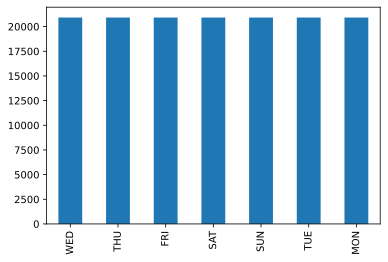

In [90]:
data.day.value_counts().plot(kind="bar")

<AxesSubplot:>

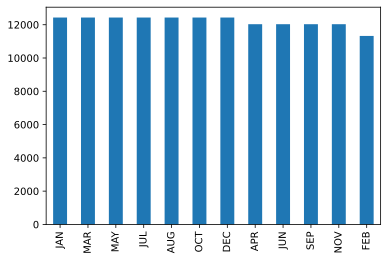

In [91]:
data.month.value_counts().plot(kind="bar")

<AxesSubplot:>

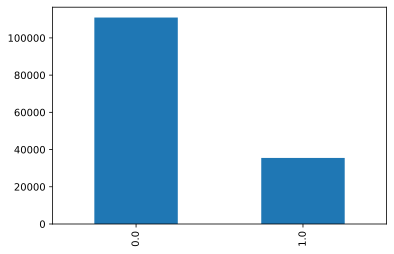

In [92]:
data.leap_year.value_counts().plot(kind="bar")

<AxesSubplot:>

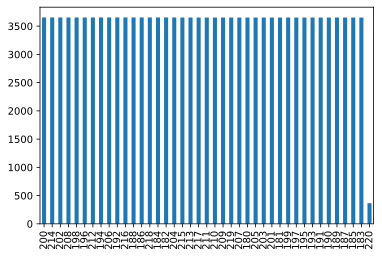

In [93]:
data.decade.value_counts().plot(kind="bar")

In [94]:
data

,day,month,leap_year,decade,date,date_timestamp,day_code,day_sin,day_cos,month_code,month_sin,month_cos,decade_scaled,date_timestamp_scaled
0,WED,JAN,0.0,180,1800-01-01,-5.364662e+09,4,-0.433884,-0.900969,0,0.0,1.000000,-1.00,-1.000000
1,THU,JAN,0.0,180,1801-01-01,-5.333126e+09,5,-0.974928,-0.222521,0,0.0,1.000000,-1.00,-0.995016
2,FRI,JAN,0.0,180,1802-01-01,-5.301590e+09,6,-0.781831,0.623490,0,0.0,1.000000,-1.00,-0.990031
3,SAT,JAN,0.0,180,1803-01-01,-5.270054e+09,0,0.000000,1.000000,0,0.0,1.000000,-1.00,-0.985047
4,SUN,JAN,1.0,180,1804-01-01,-5.238518e+09,1,0.781831,0.623490,0,0.0,1.000000,-1.00,-0.980063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146457,SAT,DEC,1.0,219,2196-12-31,7.163424e+09,0,0.000000,1.000000,11,-0.5,0.866025,0.95,0.980063
146458,SUN,DEC,0.0,219,2197-12-31,7.194960e+09,1,0.781831,0.623490,11,-0.5,0.866025,0.95,0.985047
146459,MON,DEC,0.0,219,2198-12-31,7.226496e+09,2,0.974928,-0.222521,11,-0.5,0.866025,0.95,0.990031
146460,TUE,DEC,0.0,219,2199-12-31,7.258032e+09,3,0.433884,-0.900969,11,-0.5,0.866025,0.95,0.995016


['day_sin', 'day_cos', 'month_sin', 'month_cos', 'leap_year', 'decade_scaled']
['date_timestamp_scaled']

In [95]:
# fig,ax = plt.subplots(1,figsize=(17,4))
# ax = sns.boxplot(data=data[['day_sin', 'day_cos', 'month_sin', 'month_cos', 'leap_year', 'decade_scaled']])
# ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
# plt.show()

In [96]:
# fig,ax = plt.subplots(1,figsize=(17,4))
# ax = sns.boxplot(data=data[['leap_year']])
# ax.set_xticklabels(ax.get_xticklabels(),rotation=45)
# plt.show()

In [251]:
X = data[['day_sin', 'day_cos', 'month_sin', 'month_cos', 'leap_year', 'decade_scaled']].values
X

array([[-0.43388374, -0.90096887,  0.        ,  1.        ,  0.        ,
        -1.        ],
       [-0.97492791, -0.22252093,  0.        ,  1.        ,  0.        ,
        -1.        ],
       [-0.78183148,  0.6234898 ,  0.        ,  1.        ,  0.        ,
        -1.        ],
       ...,
       [ 0.97492791, -0.22252093, -0.5       ,  0.8660254 ,  0.        ,
         0.95      ],
       [ 0.43388374, -0.90096887, -0.5       ,  0.8660254 ,  0.        ,
         0.95      ],
       [-0.43388374, -0.90096887, -0.5       ,  0.8660254 ,  0.        ,
         1.        ]])

In [252]:
len(X)

146462

In [253]:
Y = data['date_timestamp_scaled'].values.reshape(-1, 1)
Y

array([[-1.        ],
       [-0.99501574],
       [-0.99003148],
       ...,
       [ 0.99003148],
       [ 0.99501574],
       [ 1.        ]])

In [254]:
len(Y)

146462

In [255]:
# # leap = np.where(~X['leap_year'] == 1)[0]
# leap = np.where(X['leap_year'] == 1)[0]

# leap

In [256]:
train_data, test_data, train_labels, test_labels = train_test_split(X, Y, test_size=0.3, shuffle=True,
                                                                    random_state=0)

In [257]:
train_dataT = TensorDataset(torch.Tensor(train_data), torch.Tensor(train_labels))

test_dataT  = TensorDataset(torch.Tensor(test_data), torch.Tensor(test_labels))



batchsize = 32

train_loader = DataLoader(train_dataT, batch_size=batchsize, drop_last=True)

test_loader  = DataLoader(test_dataT)


In [258]:
print(f'X: {X.shape}\n')
print(f'Y: {Y.shape}\n')

print(f'Train data:   {train_data.shape}\n')
print(f'Train labels: {train_labels.shape}\n')
print(f'Test data:    {test_data.shape}\n')
print(f'Test labels:  {test_labels.shape}')

X: (146462, 6)

Y: (146462, 1)

Train data:   (102523, 6)

Train labels: (102523, 1)

Test data:    (43939, 6)

Test labels:  (43939, 1)


In [259]:
class Model(nn.Module):
    
    def __init__(self):
        super().__init__()

        self.input = nn.Linear(6, 32)

        self.fc1 = nn.Linear(32, 128)
        self.bnorm1 = nn.BatchNorm1d(128)

        self.fc2 = nn.Linear(128, 512)
        self.bnorm2 = nn.BatchNorm1d(512)

        self.fc3 = nn.Linear(512, 64)
        self.bnorm3 = nn.BatchNorm1d(64)

        self.fc4 = nn.Linear(64, 10)
        self.bnorm4 = nn.BatchNorm1d(10)


        self.output = nn.Linear(10, 1)



    def forward(self,x):

        x = F.leaky_relu( self.input(x) )

        x = F.leaky_relu(self.bnorm1(self.fc1(x)))
        x = F.dropout(x, p=0.25, training=self.training)

        x = F.leaky_relu(self.bnorm2(self.fc2(x)))
        x = F.dropout(x, p=0.25, training=self.training)

        x = F.leaky_relu(self.bnorm3(self.fc3(x)))
        x = F.dropout(x, p=0.25, training=self.training)


        x = F.leaky_relu(self.bnorm4(self.fc4(x)))
        x = F.dropout(x, p=0.25, training=self.training)


        x = torch.tanh(self.output(x))

        return x
        


In [260]:
test_x, test_y = next(iter(train_loader))

print(f'X: {X.shape}\n')
print(f'Y: {Y.shape}\n')



X: (146462, 6)

Y: (146462, 1)



In [261]:
model = Model().to(device)

# test_hat = model(torch.randn(32,6))
test_hat = model(test_x)

print(test_hat.shape)

torch.Size([32, 1])


In [262]:
for p in list(model.named_parameters()):
    if 'weight' in p[0] and 'bnorm' not in p[0]:
        nn.init.xavier_normal_(p[1].data)
        print(p[0])
        print(p[1].data.shape)

input.weight
torch.Size([32, 6])
fc1.weight
torch.Size([128, 32])
fc2.weight
torch.Size([512, 128])
fc3.weight
torch.Size([64, 512])
fc4.weight
torch.Size([10, 64])
output.weight
torch.Size([1, 10])


In [263]:
lossfun = nn.MSELoss()

# optimizer = torch.optim.Adam(model.parameters(), lr=0.0002, betas=(0.5, 0.999), weight_decay=1e-5)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, betas=(0.5, 0.999))

In [268]:
numepochs = 1

trainLoss = torch.zeros(numepochs)
testLoss   = torch.zeros(numepochs)
trainAcc  = torch.zeros(numepochs)
testAcc    = torch.zeros(numepochs)


for epochi in range(numepochs):
    
    model.train() # switch to train mode

    batchLoss = []
    batchAcc  = []

    for X,y in train_loader:

        X = X.to(device)
        y = y.to(device)

        yHat = model(X)
        loss = lossfun(yHat, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        batchLoss.append(loss.item())
        batchAcc.append( torch.mean(( yHat == y).float() ).item() )
        
        
    
    trainLoss[epochi] = np.mean(batchLoss)
    trainAcc[epochi]  = 100*np.mean(batchAcc)


    
    model.eval() # switch to test mode
    
    XX,yy = next(iter(test_loader))

    XX = XX.to(device)
    yy = yy.to(device)

    # forward pass and loss
    with torch.no_grad():
        yHat_test = model(XX)
        loss = lossfun(yHat_test, yy)


    testLoss[epochi] = loss.item()
    testAcc[epochi]  = 100*torch.mean( (yHat_test == yy).float() ).item()


trainLoss, testLoss, trainAcc, testAcc

(tensor([0.0139]), tensor([0.0025]), tensor([0.]), tensor([0.]))

In [269]:
yHat.shape, y.shape

(torch.Size([32, 1]), torch.Size([32, 1]))

In [270]:
yHat_test.shape, yy.shape

(torch.Size([1, 1]), torch.Size([1, 1]))

In [273]:
yHat.flatten(), y.flatten()

(tensor([ 0.9346,  0.2443,  0.2684,  0.6148,  0.9983, -0.2054, -0.9936,  0.2608,
         -0.1465, -0.3860,  0.8930,  0.9648,  0.4216,  0.4219, -0.4645, -0.9785,
         -0.3241,  0.7344,  0.8995,  0.3377, -0.1345, -0.4303, -0.9703, -0.9926,
         -0.4298, -0.4737,  0.6881, -0.2193,  0.0695,  0.2552, -0.7698,  0.2623],
        grad_fn=<ReshapeAliasBackward0>),
 tensor([ 0.9213,  0.4422,  0.2880,  0.7082,  0.9481, -0.2169, -0.9890,  0.4658,
         -0.1774, -0.4788,  0.8186,  0.9359,  0.4277,  0.4367, -0.4935, -0.9666,
         -0.3445,  0.7509,  0.7994,  0.4863, -0.1029, -0.4038, -0.9918, -0.9944,
         -0.5291, -0.5503,  0.6238, -0.2900,  0.0055,  0.6300, -0.7275,  0.1990]))

In [274]:
yHat_test.flatten(), yy.flatten()

(tensor([-0.9678]), tensor([-0.9181]))

In [ ]:
decade -> decade_sin, decade_cos

In [275]:
data

,day,month,leap_year,decade,date,date_timestamp,day_code,day_sin,day_cos,month_code,month_sin,month_cos,decade_scaled,date_timestamp_scaled
0,WED,JAN,0.0,180,1800-01-01,-5.364662e+09,4,-0.433884,-0.900969,0,0.0,1.000000,-1.00,-1.000000
1,THU,JAN,0.0,180,1801-01-01,-5.333126e+09,5,-0.974928,-0.222521,0,0.0,1.000000,-1.00,-0.995016
2,FRI,JAN,0.0,180,1802-01-01,-5.301590e+09,6,-0.781831,0.623490,0,0.0,1.000000,-1.00,-0.990031
3,SAT,JAN,0.0,180,1803-01-01,-5.270054e+09,0,0.000000,1.000000,0,0.0,1.000000,-1.00,-0.985047
4,SUN,JAN,1.0,180,1804-01-01,-5.238518e+09,1,0.781831,0.623490,0,0.0,1.000000,-1.00,-0.980063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146457,SAT,DEC,1.0,219,2196-12-31,7.163424e+09,0,0.000000,1.000000,11,-0.5,0.866025,0.95,0.980063
146458,SUN,DEC,0.0,219,2197-12-31,7.194960e+09,1,0.781831,0.623490,11,-0.5,0.866025,0.95,0.985047
146459,MON,DEC,0.0,219,2198-12-31,7.226496e+09,2,0.974928,-0.222521,11,-0.5,0.866025,0.95,0.990031
146460,TUE,DEC,0.0,219,2199-12-31,7.258032e+09,3,0.433884,-0.900969,11,-0.5,0.866025,0.95,0.995016


In [281]:
len(data)

146462

In [285]:
len(data.decade.unique())

41

In [287]:
data.decade.iloc[0], data.decade.iloc[-1]

(180, 220)

In [290]:
(data.decade.iloc[-1] - data.decade.iloc[0]) + 1

41

In [280]:
len(data.date.unique())

146462

In [282]:
len(data.date.unique()) == len(data)

True

In [291]:
# alpha = len(data.decade.unique())
alpha = (data.decade.iloc[-1] - data.decade.iloc[0]) + 1

data['decade_sin'] = np.sin(data['decade'] * (2 * np.pi / alpha))
data['decade_cos'] = np.cos(data['decade'] * (2 * np.pi / alpha))

In [292]:
data

,day,month,leap_year,decade,date,date_timestamp,day_code,day_sin,day_cos,month_code,month_sin,month_cos,decade_scaled,date_timestamp_scaled,decade_sin,decade_cos
0,WED,JAN,0.0,180,1800-01-01,-5.364662e+09,4,-0.433884,-0.900969,0,0.0,1.000000,-1.00,-1.000000,0.636242,-0.771489
1,THU,JAN,0.0,180,1801-01-01,-5.333126e+09,5,-0.974928,-0.222521,0,0.0,1.000000,-1.00,-0.995016,0.636242,-0.771489
2,FRI,JAN,0.0,180,1802-01-01,-5.301590e+09,6,-0.781831,0.623490,0,0.0,1.000000,-1.00,-0.990031,0.636242,-0.771489
3,SAT,JAN,0.0,180,1803-01-01,-5.270054e+09,0,0.000000,1.000000,0,0.0,1.000000,-1.00,-0.985047,0.636242,-0.771489
4,SUN,JAN,1.0,180,1804-01-01,-5.238518e+09,1,0.781831,0.623490,0,0.0,1.000000,-1.00,-0.980063,0.636242,-0.771489
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146457,SAT,DEC,1.0,219,2196-12-31,7.163424e+09,0,0.000000,1.000000,11,-0.5,0.866025,0.95,0.980063,0.839365,-0.543568
146458,SUN,DEC,0.0,219,2197-12-31,7.194960e+09,1,0.781831,0.623490,11,-0.5,0.866025,0.95,0.985047,0.839365,-0.543568
146459,MON,DEC,0.0,219,2198-12-31,7.226496e+09,2,0.974928,-0.222521,11,-0.5,0.866025,0.95,0.990031,0.839365,-0.543568
146460,TUE,DEC,0.0,219,2199-12-31,7.258032e+09,3,0.433884,-0.900969,11,-0.5,0.866025,0.95,0.995016,0.839365,-0.543568
